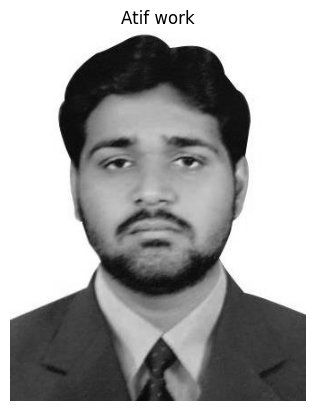

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def display_image(image_path):
    # Open the image file
    img = Image.open(image_path)

    # Display the image using matplotlib
    plt.imshow(img)
    plt.title("Atif work")
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Example usage:
image_path = '/content/kkkk.jpg'
display_image(image_path)

In [ ]:
from PIL import Image
import numpy as np

def image_to_array(image_path):
    # Open the image file
    img = Image.open(image_path)

    # Convert the image to grayscale (optional)
    img = img.convert('L')

    # Convert image to numpy array
    img_array = np.array(img)

    return img_array

# Example usage:
image_path = '/content/kkkk.jpg'
img_array = image_to_array(image_path)

# Now you can use img_array for further processing or analysis
print("Image shape:", img_array.shape)  # Shape of the array (height, width)
print("Array data type:", img_array.dtype)  # Data type of the array (e.g., uint8)

# Optionally, you can save the array as a text or binary file if needed
# np.savetxt('image_array.txt', img_array, fmt='%d')  # Save as text file
# np.save('image_array.npy', img_array)  # Save as binary file


Image shape: (414, 331)
Array data type: uint8


In [ ]:
from PIL import Image
import numpy as np

def image_to_matrix(image_path):
    # Open the image file
    img = Image.open(image_path)

    # Convert the image to grayscale (optional)
    img = img.convert('L')

    # Convert image to numpy array
    img_array = np.array(img)

    # Create a matrix from the image array
    matrix = img_array / 255.0  # Normalize pixel values to range [0, 1]

    return matrix

# Example usage:
image_path = '/content/kkkk.jpg'
matrix = image_to_matrix(image_path)

# Now you can use the matrix for further processing or analysis
print("Matrix shape:", matrix.shape)  # Shape of the matrix (height, width)
print("Matrix data type:", matrix.dtype)  # Data type of the matrix (e.g., float64)

# Optionally, you can print the matrix
print("Matrix values:")
print(matrix)


Matrix shape: (414, 331)
Matrix data type: float64
Matrix values:
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.23137255 0.23137255 0.23529412 ... 0.2        0.2        0.2       ]
 [0.22745098 0.22745098 0.23137255 ... 0.2        0.2        0.2       ]
 [0.23137255 0.23137255 0.23137255 ... 0.20392157 0.20392157 0.20392157]]


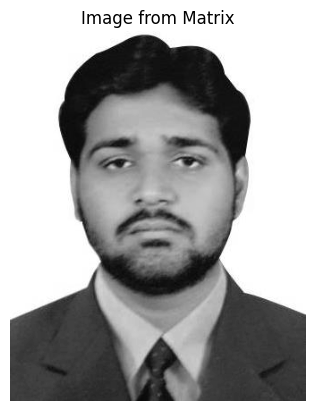

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def image_to_matrix(image_path):
    # Open the image file
    img = Image.open(image_path)

    # Convert the image to grayscale (optional)
    img = img.convert('L')

    # Convert image to numpy array
    img_array = np.array(img)

    # Normalize pixel values to range [0, 1]
    matrix = img_array / 255.0

    return matrix, img.size

def display_image_from_matrix(matrix, size):
    # Convert the matrix back to uint8 type (0-255 range)
    img_array = (matrix * 255).astype(np.uint8)

    # Create a PIL Image object from the array
    img = Image.fromarray(img_array)

    # Display the image using matplotlib
    plt.imshow(img, cmap='gray')  # Show image in grayscale
    plt.title("Image from Matrix")
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Example usage:
image_path = '/content/kkkk.jpg'
matrix, img_size = image_to_matrix(image_path)

# Display the image from the matrix
display_image_from_matrix(matrix, img_size)


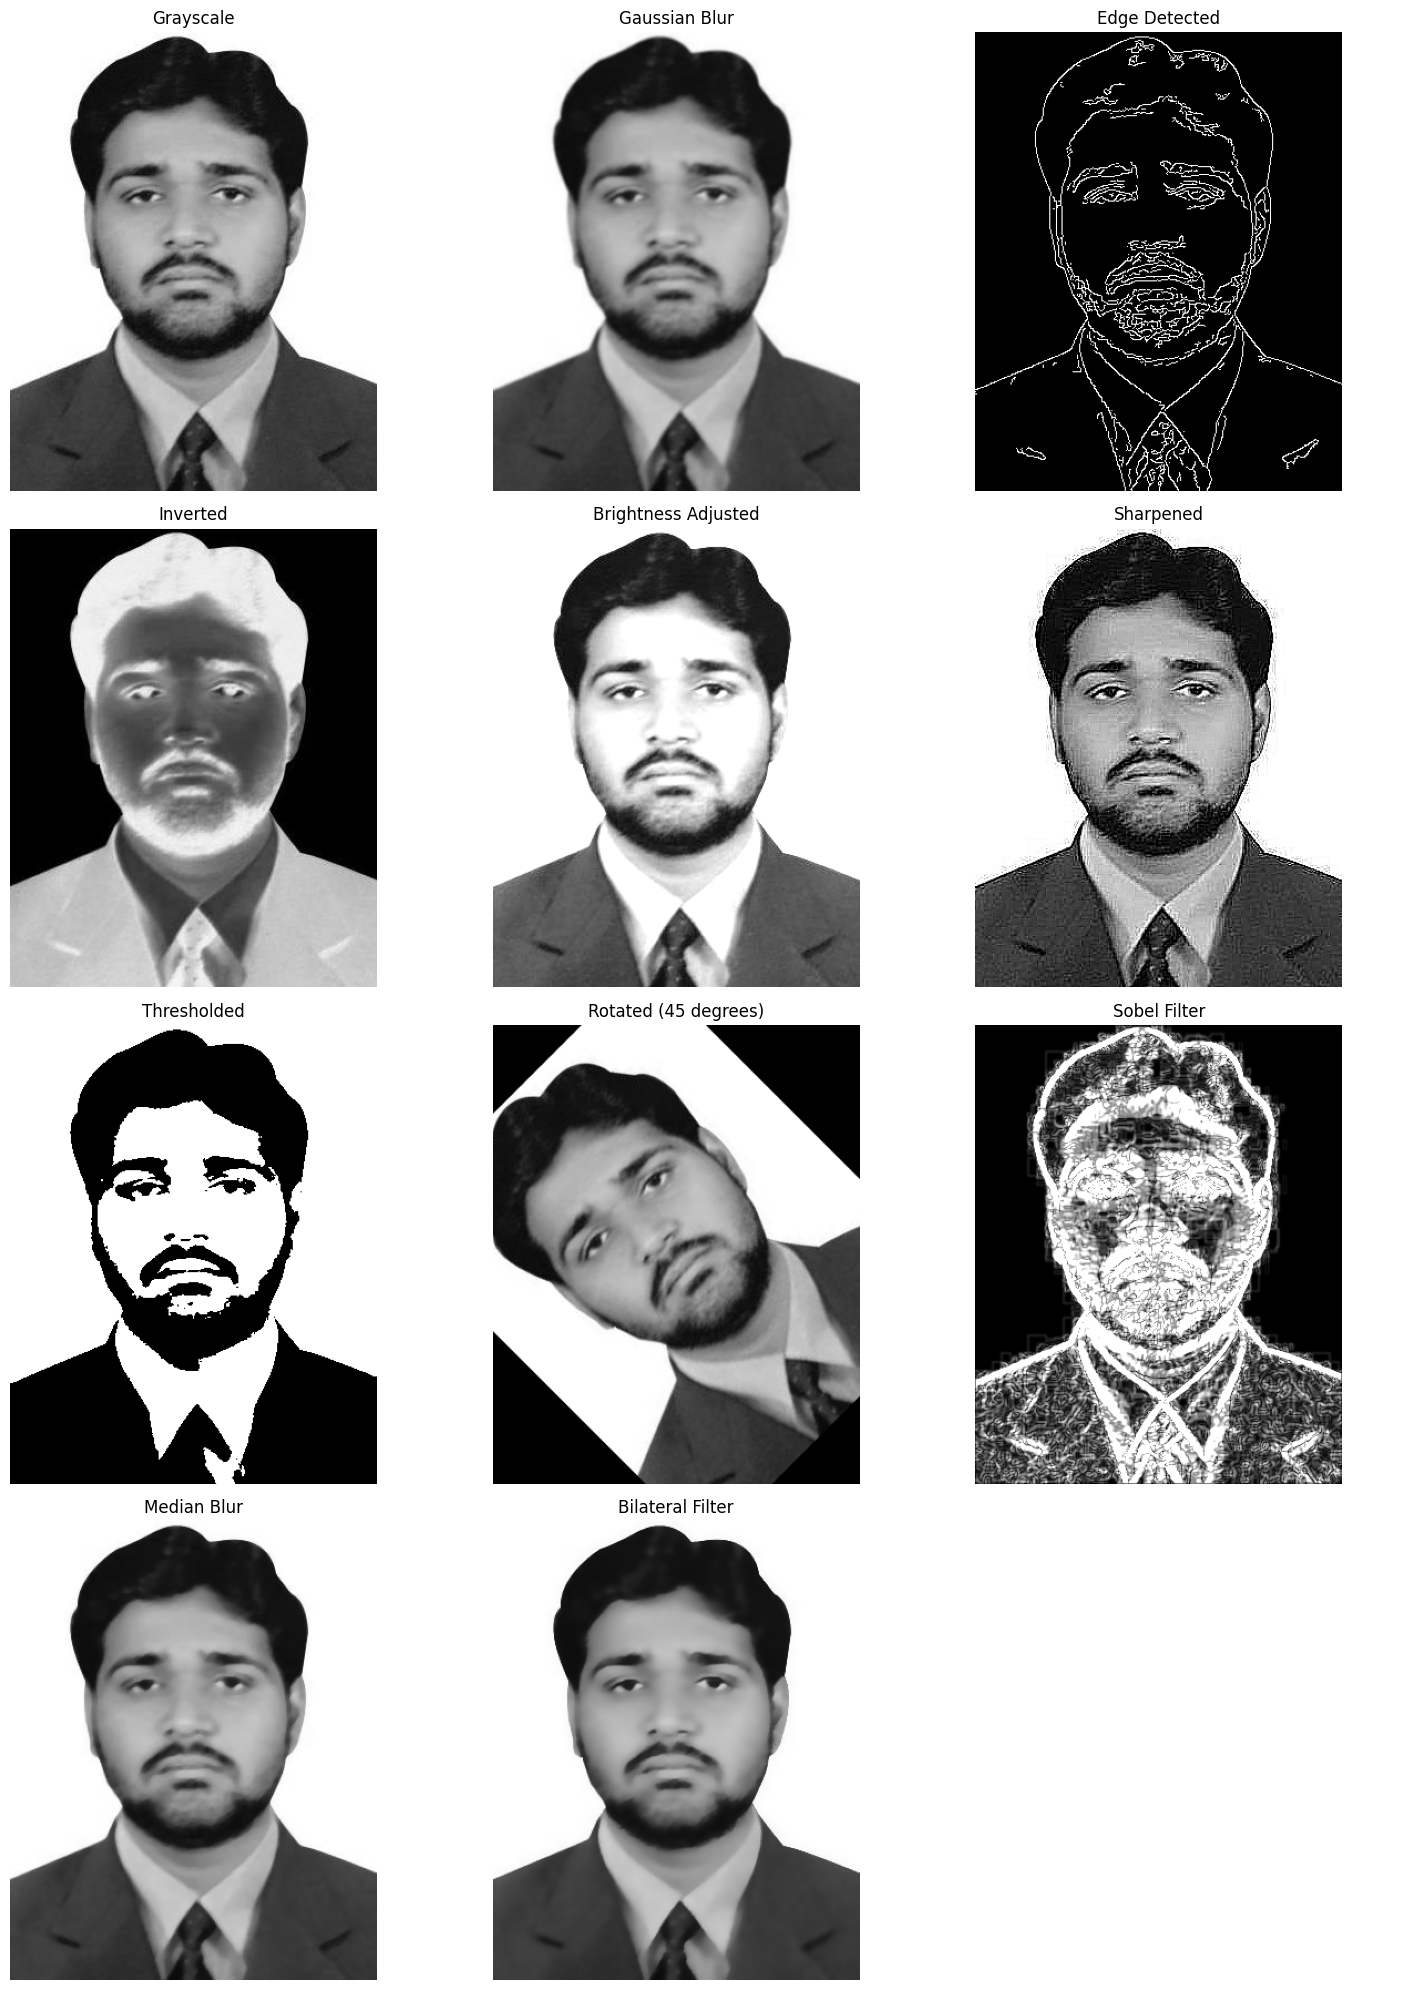

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_grayscale(image):
    # Convert to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_img

# image: The input image to which the Gaussian blur will be applied.
# kernel_size: A tuple specifying the width and height of the Gaussian kernel. By default, it's set to (5, 5)
# 0: This parameter specifies the standard deviation, If set to 0, OpenCV automatically calculates it based on the kernel size.
def apply_gaussian_blur(image, kernel_size=(5, 5)):
    # Apply Gaussian blur
    blurred_img = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_img

# threshold1: The first threshold for the hysteresis procedure in Canny edge detection. It represents the lower threshold.
# threshold2: The second threshold for the hysteresis procedure in Canny edge detection. It represents the upper threshold.

def apply_edge_detection(image):
    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1=30, threshold2=100)
    return edges

# The cv2.bitwise_not() function performs a bitwise NOT operation on the image, which effectively computes the bitwise complement of the pixel values.
# This operation is used to create the inverted version of the image.

def apply_invert(image):
    # Invert the image
    inverted_img = cv2.bitwise_not(image)
    return inverted_img

# brightness_factor: A numeric value that specifies how much to adjust the brightness.
# A value less than 1 decreases brightness.
# A value greater than 1 increases brightness.
# A value of 1 keeps the brightness unchanged.

# alpha: A scaling factor that adjusts the contrast of the image.  it's used to adjust the brightness.
# If alpha > 1, it increases the brightness.
# If alpha < 1, it decreases the brightness.
# beta: An optional parameter that is set to 0 in this case. It's used for additional brightness adjustment,
#  but it's not necessary for simple brightness adjustment.

def adjust_brightness(image, brightness_factor):
    # Adjust brightness
    adjusted_img = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)
    return adjusted_img

# The sharpening kernel is designed to enhance edges and details in the image by emphasizing differences in pixel intensity.
# In this case, the kernel has a center weight of 9 surrounded by -1 weights, which is a common configuration for sharpening.

def apply_sharpen(image):
    # Sharpening kernel
    kernel_sharpening = np.array([[-1, -1, -1],
                                   [-1, 9, -1],
                                   [-1, -1, -1]])
    sharpened_img = cv2.filter2D(image, -1, kernel_sharpening)
    return sharpened_img

# image: The input grayscale image (single-channel) to be thresholded.
# 128: The threshold value used to classify pixel values.
# 255: The maximum value that pixel values can be set to if they are above the threshold (cv2.THRESH_BINARY).
# cv2.THRESH_BINARY: The thresholding type which sets pixel values above the threshold to the maximum value (255) and below or equal to the threshold to 0.

def apply_threshold(image):
    # Apply binary thresholding
    _, thresholded_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    return thresholded_img

# angle: The angle (in degrees) by which the image will be rotated clockwise.
# (width/2, height/2): The rotation center point, which is set to the center of the image ((width/2, height/2)).
# angle: The rotation angle in degrees.
# 1: The scale factor for the rotation (default value 1 means no scaling).
# The cv2.warpAffine() function is used to apply the computed rotation matrix (rotation_matrix) to the input image.
# rotation_matrix: The rotation transformation matrix.

def apply_rotation(image, angle):
    # Rotate the image
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    rotated_img = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_img

# cv2.CV_64F: Output image depth (64-bit floating-point).
# 1, 0: Order of the derivative in x and y directions (first derivative in x-direction and no derivative in y-direction).
# ksize=5: Size of the Sobel kernel (5x5) used for filtering.
# cv2.convertScaleAbs(sobelx): Converts the floating-point output (sobelx) to absolute values and converts it to 8-bit format.
# cv2.convertScaleAbs(sobely): Converts the floating-point output (sobely) to absolute values and converts it to 8-bit format.
# cv2.addWeighted(): Combines the scaled sobelx and sobely images using weighted addition.
# The resulting sobel_combined image is calculated as 0.5 * sobelx + 0.5 * sobely, which creates a combined gradient magnitude image.

def apply_sobel(image):
    # Apply Sobel edge detection
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)
    return sobel_combined

# kernel_size: The size of the median filter kernel. By default, it's set to 5.

def apply_median_blur(image, kernel_size=5):
    # Apply Median blur
    blurred_img = cv2.medianBlur(image, kernel_size)
    return blurred_img

# d: Diameter of the pixel neighborhood used during filtering. Larger d means that farther pixels will influence each other.
# sigmaColor: Filter sigma in the color space. A larger value of sigmaColor means that colors farther apart will be mixed together.
# sigmaSpace: Filter sigma in the coordinate space. A larger value of sigmaSpace means that pixels farther apart will influence each other.

def apply_bilateral_filter(image, d=9, sigmaColor=75, sigmaSpace=75):
    # Apply Bilateral filter
    filtered_img = cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)
    return filtered_img

# Histogram equalization works by calculating the cumulative distribution function (CDF) of the pixel intensities
# in the image's histogram and then remapping the pixel intensities based on this CDF. The result is an image with improved contrast and brightness.

def apply_histogram_equalization(image):
    # Apply Histogram Equalization
    equalized_img = cv2.equalizeHist(image)
    return equalized_img

# kernel: The structuring element (kernel) used for dilation.
# In this case, it's a 5x5 square-shaped kernel with all elements set to 1.
# iterations: The number of times dilation is applied.
# This parameter controls the strength or extent of the dilation effect. By default, it's set to 1 if not specified.

def apply_dilate(image, iterations=1):
    # Apply Dilation
    kernel = np.ones((5, 5), np.uint8)
    dilated_img = cv2.dilate(image, kernel, iterations=iterations)
    return dilated_img

def apply_erode(image, iterations=1):
    # Apply Erosion
    kernel = np.ones((5, 5), np.uint8)
    eroded_img = cv2.erode(image, kernel, iterations=iterations)
    return eroded_img

def display_images_in_grid(images, titles, rows, cols, figsize=(12, 12)):
    plt.figure(figsize=figsize)
    for i in range(rows * cols):  # Ensure exactly `rows * cols` subplots
        plt.subplot(rows, cols, i+1)
        if i < len(images):  # Display image if available
            plt.imshow(images[i], cmap='gray' if len(images[i].shape)==2 else None)
            plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load the image
image_path = '/content/kkkk.jpg'
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Unable to load image from path '{image_path}'")
else:
    # Apply selected filters and transformations
    gray_img = apply_grayscale(img)
    blurred_img = apply_gaussian_blur(img)
    edges_img = apply_edge_detection(gray_img)
    inverted_img = apply_invert(img)
    brightness_adjusted_img = adjust_brightness(img, 1.5)
    sharpened_img = apply_sharpen(img)
    thresholded_img = apply_threshold(gray_img)
    rotated_img = apply_rotation(img, 45)
    sobel_img = apply_sobel(gray_img)
    median_blur_img = apply_median_blur(img)
    bilateral_filtered_img = apply_bilateral_filter(img)

    # Prepare images and titles for display (limit to 12 items)
    images = [
        gray_img, blurred_img, edges_img, inverted_img, brightness_adjusted_img, sharpened_img,
        thresholded_img, rotated_img, sobel_img, median_blur_img, bilateral_filtered_img
    ]
    titles = [
        "Grayscale", "Gaussian Blur", "Edge Detected", "Inverted", "Brightness Adjusted",
        "Sharpened", "Thresholded", "Rotated (45 degrees)", "Sobel Filter", "Median Blur",
        "Bilateral Filter"
    ]

    # Display images in a grid layout
    display_images_in_grid(images, titles, rows=4, cols=3, figsize=(15, 20))
